**Question 2**:   
For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

### How many orders were shipped by Speedy Express in total?   

```
SELECT COUNT([Orders].OrderID) AS total_orders_shipped_byspeedyexpress
FROM [Orders]
INNER JOIN [Shippers]
ON [Orders].ShipperID = [Shippers].ShipperID
WHERE [Shippers].ShipperName = 'Speedy Express'
```

Output

```
total_orders_shipped_byspeedyexpress
54
```

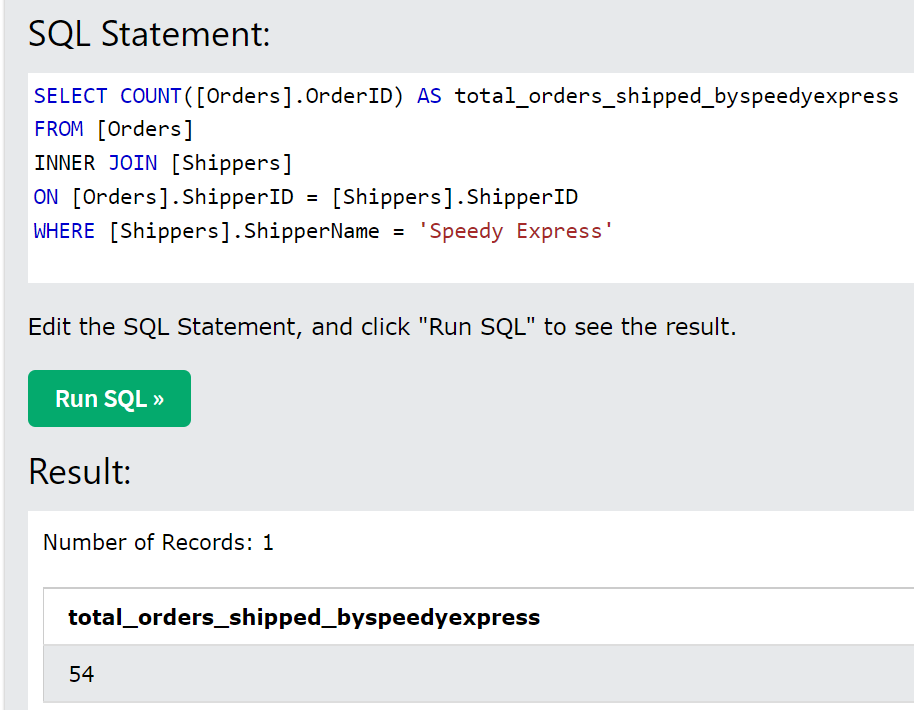

### What is the last name of the employee with the most orders?  

There could be possibility that multiple employees have same maximum number of orders and to identify that we need to condition the group by output on max order order. Since for this calculation, the subquery should be used twice so I have used CTE for that.

For this dataset, we had only 1 row with maximum order_count but for general inclusion , it's better to filter all employees with max count of orders.

```
WITH CTE_employee_orders AS
(
SELECT [Employees].LastName,
       COUNT([Orders].OrderID) AS order_count
FROM 
	   [Employees]
	   INNER JOIN [Orders]
ON 
	   [Employees].EmployeeID = [Orders].EmployeeID
GROUP BY 
	   [Employees].EmployeeID
ORDER BY 
	   order_count DESC
 ) 
 SELECT LastName,
        order_count
 FROM CTE_employee_orders 
 WHERE order_count = (SELECT MAX(order_count) FROM CTE_employee_orders)
```

output

LastName	order_count  
Peacock	40

The Last Name of employee with most orders 40 is `Peacock`

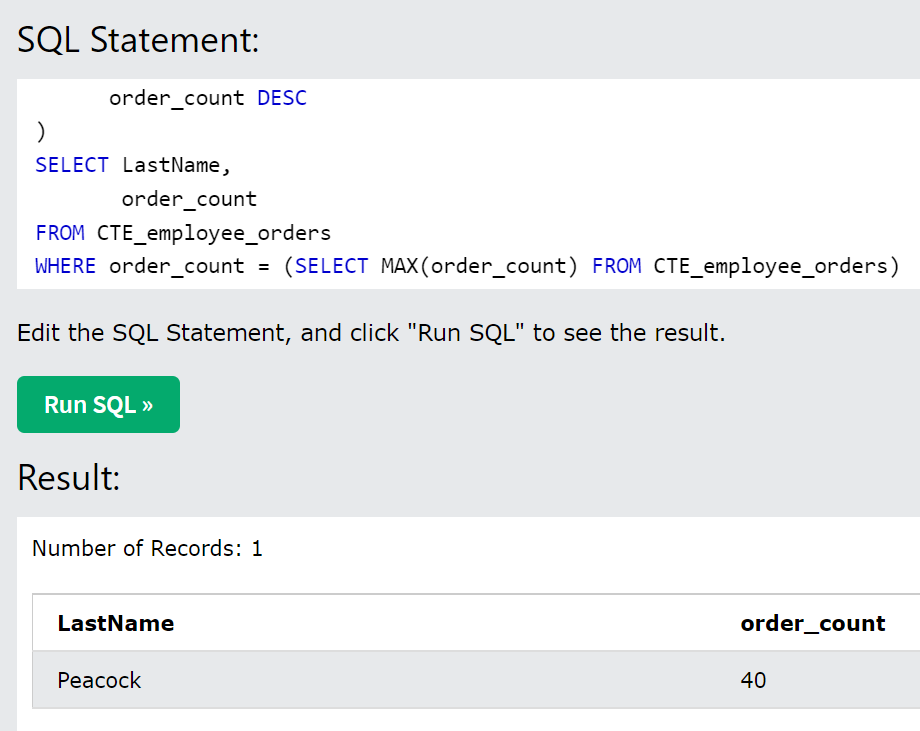

### What product was ordered the most by customers in Germany? 

Note: To answer the question which product was ordered the most by customers in Germany, I have assumed the question asks about maximum overall quantity of product ordered  

Similarly like Q2, in this case also there could be multiple products which are ordered in the maximum overall quantity and hence used CTE as subquery had to be used twice.

```
WITH CTE_product_most_ordered AS
(SELECT [Products].ProductID,
	    [Products].ProductName,
        [Products].Unit,
        [Products].Price,
	    SUM([OrderDetails].Quantity) AS order_product_quantity
FROM 
	    [OrderDetails]
	    LEFT JOIN [Products]
ON 
	    [OrderDetails].ProductID = [Products].ProductID
	    LEFT JOIN [Suppliers]
ON 
	    [Products].SupplierID = [Suppliers].SupplierID
WHERE 
	    [Suppliers].Country = 'Germany'
GROUP BY 
	    [Products].ProductID, 
	    [Products].ProductName
ORDER BY 
	    order_product_quantity DESC
)
SELECT * FROM CTE_product_most_ordered
WHERE order_product_quantity = (SELECT MAX(order_product_quantity) FROM CTE_product_most_ordered)
```

output

ProductID	ProductName	Unit	Price	order_product_quantity  
26	Gumbär Gummibärchen	100 - 250 g bags	31.23	232


The product `Gumbär Gummibärchen` is ordered the most with dataset showing 232 bags being ordered for it.

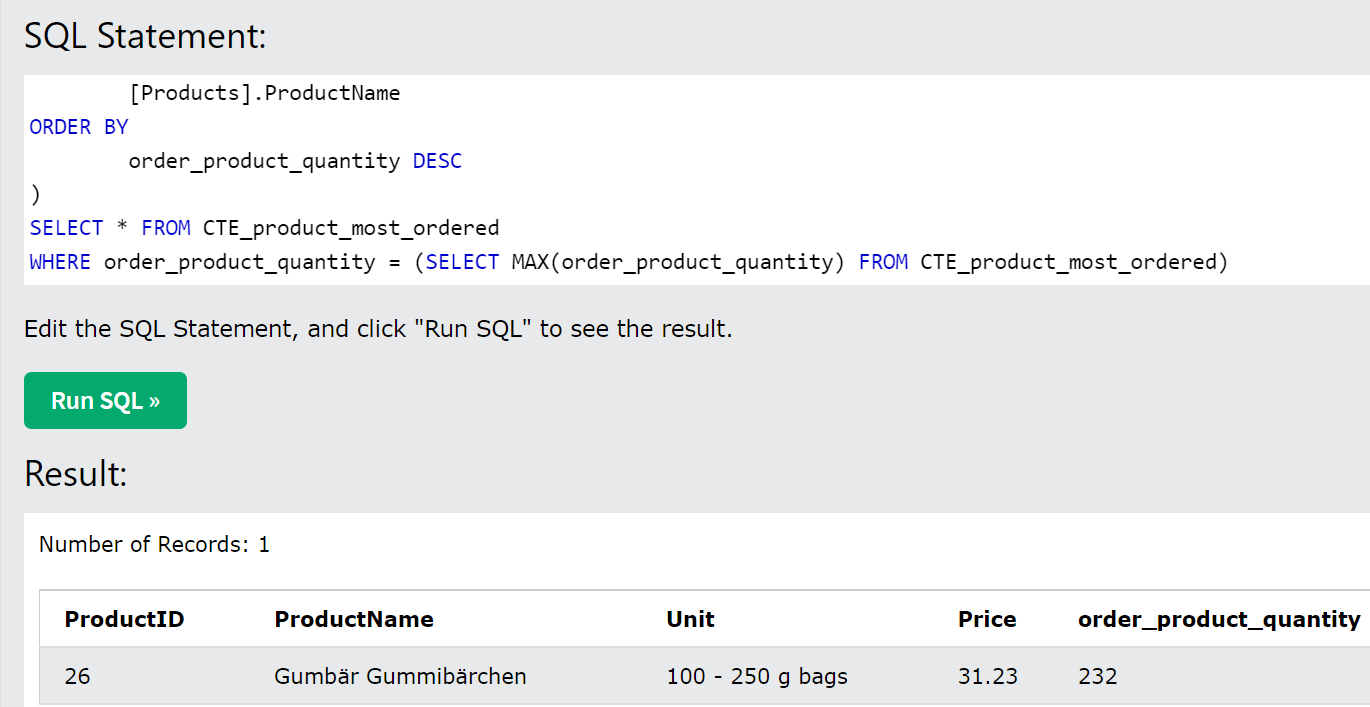